## Imports, constants

In [1]:
import sys
from pathlib import Path

# Get the project root (1 level up from notebook)
project_root = Path.cwd().parent

# Add to sys.path if not already present
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from HW4.P3_helpers import *
from Tools.constants import *
from Midterm.many_shapes import *
from Midterm.cost import *


In [2]:
# Givens
M = 3
gamma = gamma_air
P = P_sea  # Pa
T = 300  # K
L = 1  # m, depth into page

In [3]:
lowest_per_shape = {}

## Parabolas

Global min: a=0.0100, num_points=9, cost=6.55003e+06


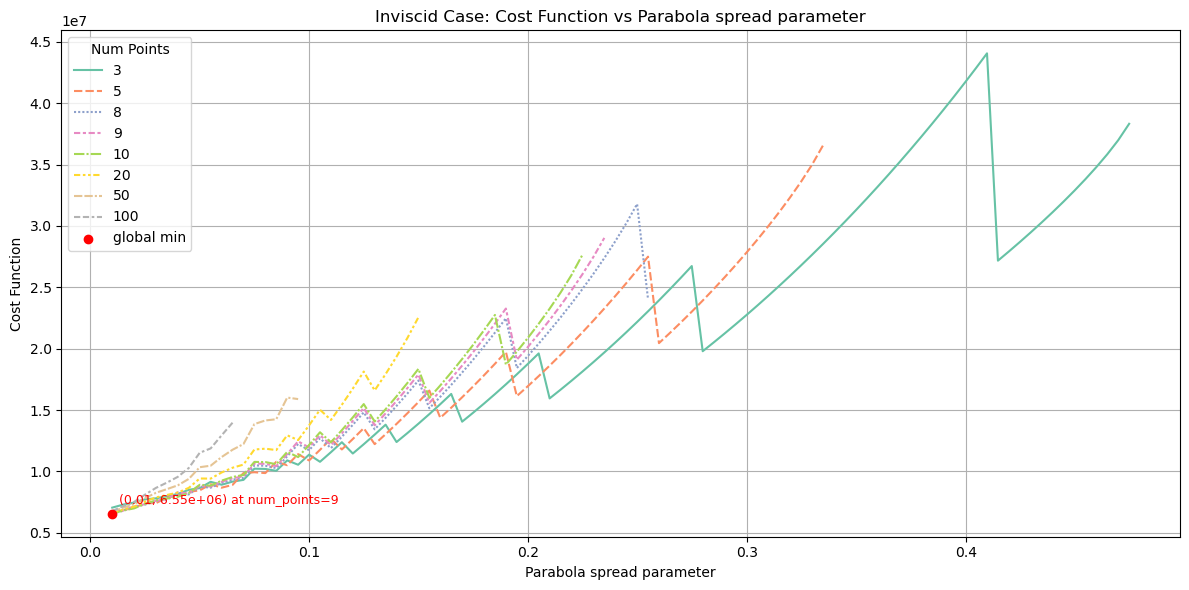

In [22]:
# Parameters to sweep
a_values = np.linspace(0.01, 5.0, 1000)
num_points = [3, 5, 8, 9, 10, 20, 50, 100]

# Collect results in a list of dictionaries
parabola_records = []
for num in num_points:
    for a in a_values:
        profile = generate_parabola_profile(a, num_points=num)
        N, D, cost = cost_function(profile['x'], profile['y_top'], profile['y_bot'], M, gamma, P, T, L, inviscid=True)
        parabola_records.append({
            "a": a,
            "num_points": num,
            "cost": cost,
            "N": N,
            "D": D
        })

# Convert to DataFrame
parabola_df = pd.DataFrame(parabola_records)

# global minimum
idx_min = parabola_df["cost"].idxmin()
a_star = parabola_df.loc[idx_min, "a"]
num_star = parabola_df.loc[idx_min, "num_points"]
cost_star_parabola = parabola_df.loc[idx_min, "cost"]
print(f"Global min: a={a_star:.4f}, num_points={num_star}, cost={cost_star_parabola:.6g}")

# plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=parabola_df, x="a", y="cost", hue="num_points", style="num_points", palette="Set2")
plt.scatter(a_star, cost_star_parabola, color="red", zorder=5, label="global min")

# corrected text placement
plt.annotate(
    f"({a_star:.2f}, {cost_star_parabola:.4g}) at num_points={num_star}",
    xy=(a_star, cost_star_parabola), xytext=(5, 5), textcoords="offset points",
    color="red", fontsize=9, ha="left", va="bottom"
)

plt.xlabel("Parabola spread parameter")
plt.ylabel("Cost Function")
plt.title("Inviscid Case: Cost Function vs Parabola spread parameter")
plt.grid(True)
plt.legend(title="Num Points", loc="best")
plt.tight_layout()
plt.show()

lowest_per_shape['parabola'] = {
    "a_star": a_star,
    "num_star": num_star,
    "cost_star": cost_star_parabola
}


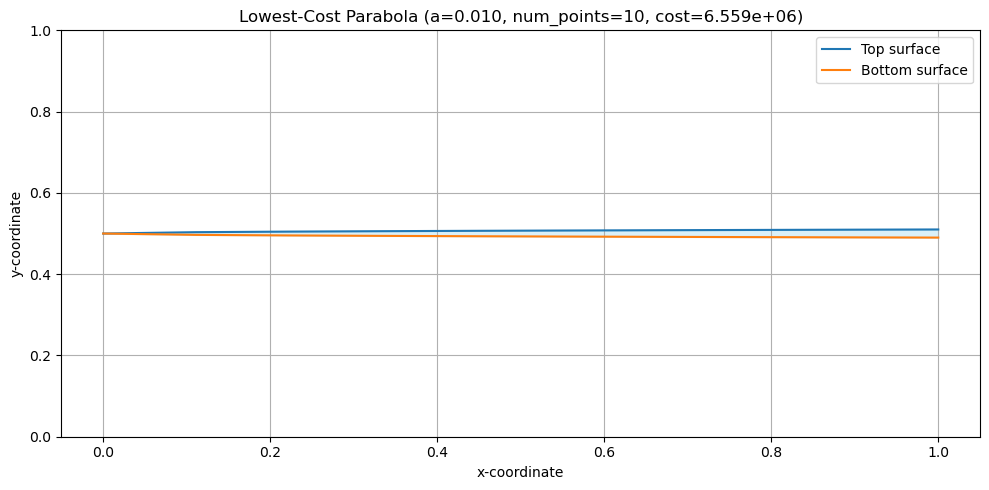

In [14]:
# plot the lowest-cost parabola shape
best_profile = generate_parabola_profile(a_star, num_points=num_star)

plt.figure(figsize=(10, 5))
plt.plot(best_profile["x"], best_profile["y_top"], label="Top surface")
plt.plot(best_profile["x"], best_profile["y_bot"], label="Bottom surface")
plt.fill_between(best_profile["x"], best_profile["y_bot"], best_profile["y_top"], color="skyblue", alpha=0.3)

plt.title(f"Lowest-Cost Parabola (a={a_star:.3f}, num_points={num_star}, cost={cost_star_parabola:.4g})")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Triangles

Global min: half_angle=0.1000°, cost=8.1627e+06


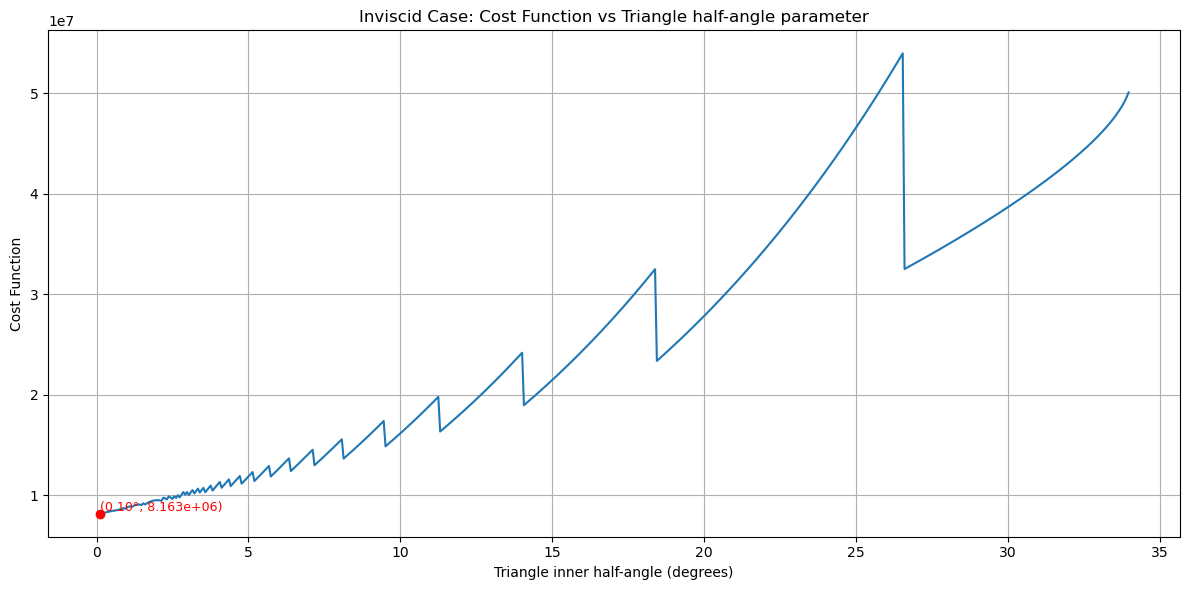

In [15]:
# Parameters to sweep
half_angle_values = np.linspace(0.1, 60, 1000) # degrees

# Collect results in a list of dictionaries
triangle_records = []
for half_angle in half_angle_values:
    profile = generate_triangle_profile(half_angle)
    N,D,cost = cost_function(profile['x'], profile['y_top'], profile['y_bot'], M, gamma, P, T, L, inviscid=True)
    triangle_records.append({
        "half_angle": half_angle,
        "cost": cost,
        "N": N,
        "D": D
        })

# Convert to DataFrame
triangle_df = pd.DataFrame(triangle_records)

# global minimum
idx_min = triangle_df["cost"].idxmin()
half_star = triangle_df.loc[idx_min, "half_angle"]
cost_star_triangle = triangle_df.loc[idx_min, "cost"]
print(f"Global min: half_angle={half_star:.4f}°, cost={cost_star_triangle:.6g}")

# plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=triangle_df, x="half_angle", y="cost", color="C0")
plt.scatter(half_star, cost_star_triangle, color="red", zorder=5, label="global min")
plt.text(
    half_star, cost_star_triangle,
    f"({half_star:.2f}°, {cost_star_triangle:.4g})",
    color="red", fontsize=9,
    ha="left", va="bottom"
)
plt.xlabel("Triangle inner half-angle (degrees)")
plt.ylabel("Cost Function")
plt.title("Inviscid Case: Cost Function vs Triangle half-angle parameter")
plt.grid(True)
plt.tight_layout()
plt.show()

lowest_per_shape['triangle'] = {
    "half_star": half_star,
    "cost_star": cost_star_triangle
}


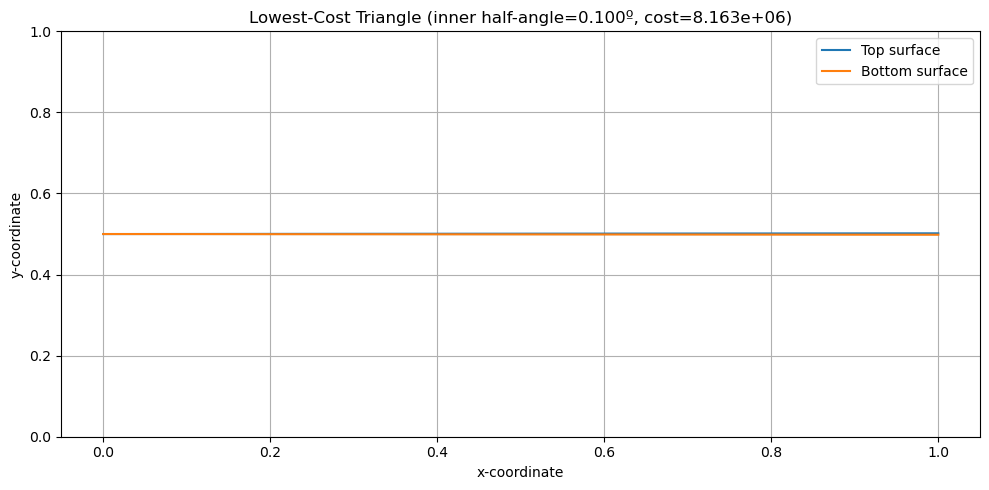

In [17]:
best_profile = generate_triangle_profile(half_star)

plt.figure(figsize=(10, 5))
plt.plot(best_profile["x"], best_profile["y_top"], label="Top surface")
plt.plot(best_profile["x"], best_profile["y_bot"], label="Bottom surface")
plt.fill_between(best_profile["x"], best_profile["y_bot"], best_profile["y_top"], color="skyblue", alpha=0.3)

plt.title(f"Lowest-Cost Triangle (inner half-angle={half_star:.3f}º, cost={cost_star_triangle:.4g})")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Trapezoids

In [18]:
# Parameters to sweep
height_values = np.linspace(0.1, 1.0, 100)
top_length_values = np.linspace(0.1, 0.9, 100)

# Collect results in a list of dictionaries
trapezoid_records = []
for height in height_values:
    for top_length in top_length_values:
        profile = generate_trapezoid_profile(height, top_length)
        N, D, cost = cost_function(profile['x'], profile['y_top'], profile['y_bot'], M, gamma, P, T, L, inviscid=False)
        trapezoid_records.append({
            "height": height,
            "top_length": top_length,
            "cost": cost,
            "N": N, 
            "D": D
        })


In [9]:
# Assume you end up with lists of equal length:
heights   = np.array([r["height"] for r in trapezoid_records])
toplens   = np.array([r["top_length"] for r in trapezoid_records])
costs     = np.array([r["cost"] for r in trapezoid_records])
Ns        = np.array([r["N"] for r in trapezoid_records])
Ds        = np.array([r["D"] for r in trapezoid_records])

Hvals = np.unique(heights)          # 1000
Tvals = np.unique(toplens)          # 1000
Hn, Tn = len(Hvals), len(Tvals)

# Map (height, top_length) → grid indices
H_idx = np.searchsorted(Hvals, heights)
T_idx = np.searchsorted(Tvals, toplens)

cost_grid = np.empty((Hn, Tn)); cost_grid[:] = np.nan
N_grid    = np.empty((Hn, Tn)); N_grid[:]    = np.nan
D_grid    = np.empty((Hn, Tn)); D_grid[:]    = np.nan
cost_grid[H_idx, T_idx] = costs
N_grid[H_idx, T_idx]    = Ns
D_grid[H_idx, T_idx]    = Ds


Global min: height=0.1000, top_length=0.4313, cost=1.89814e+07


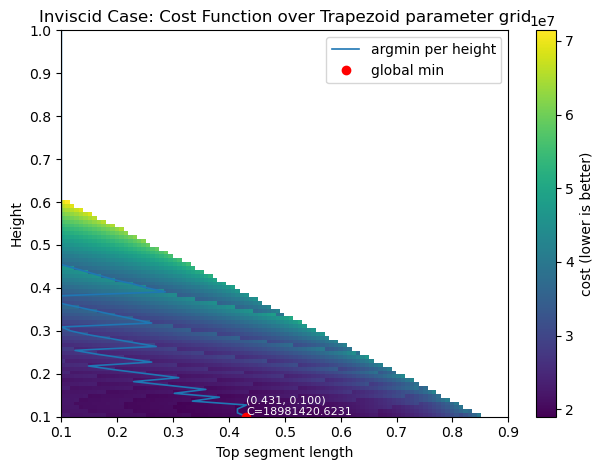

In [10]:
# per-height minima
best_j = np.nanargmin(cost_grid, axis=1)                 # j*(h)
best_T = Tvals[best_j]                                   # top_length*(h)
best_C = cost_grid[np.arange(len(Hvals)), best_j]        # C_min(h)

# global minimum
i_star, j_star = np.unravel_index(np.nanargmin(cost_grid), cost_grid.shape)
H_star, T_star, cost_star_trapezoid = Hvals[i_star], Tvals[j_star], cost_grid[i_star, j_star]
print(f"Global min: height={H_star:.4f}, top_length={T_star:.4f}, cost={cost_star_trapezoid:.6g}")

# plot
fig, ax = plt.subplots()
im = ax.imshow(
    cost_grid,
    origin="lower",
    extent=[Tvals.min(), Tvals.max(), Hvals.min(), Hvals.max()],
    aspect="auto",
    cmap="viridis"
)
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("cost (lower is better)")

ax.plot(best_T, Hvals, linewidth=1.2, label="argmin per height")
ax.plot(T_star, H_star, "ro", label="global min")

# label the point
ax.text(
    T_star, H_star,
    f"({T_star:.3f}, {H_star:.3f})\nC={cost_star_trapezoid:.4f}",
    color="white", fontsize=8,
    ha="left", va="bottom"
)

ax.set_xlabel("Top segment length")
ax.set_ylabel("Height")
ax.set_title("Inviscid Case: Cost Function over Trapezoid parameter grid")
ax.legend()
plt.tight_layout()
plt.show()

lowest_per_shape['trapezoid'] = {
    "H_star": H_star,
    "T_star": T_star,
    "cost_star": cost_star_trapezoid
}


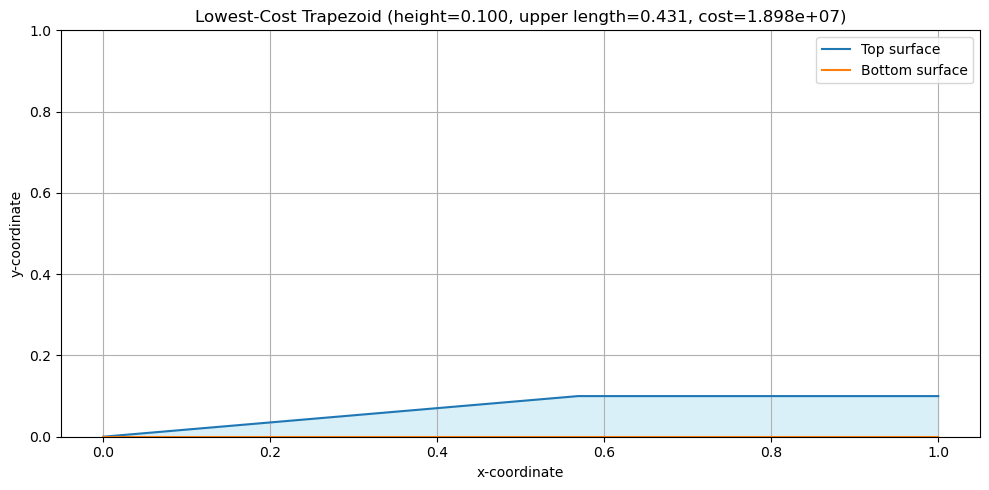

In [19]:
# plot the lowest-cost 
best_profile = generate_trapezoid_profile(H_star, T_star)

plt.figure(figsize=(10, 5))
plt.plot(best_profile["x"], best_profile["y_top"], label="Top surface")
plt.plot(best_profile["x"], best_profile["y_bot"], label="Bottom surface")
plt.fill_between(best_profile["x"], best_profile["y_bot"], best_profile["y_top"], color="skyblue", alpha=0.3)

plt.title(f"Lowest-Cost Trapezoid (height={H_star:.3f}, upper length={T_star:.3f}, cost={cost_star_trapezoid:.4g})")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
